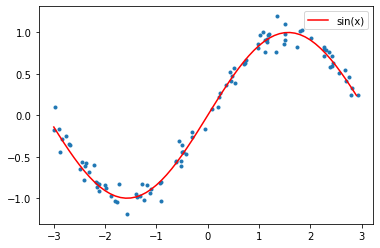

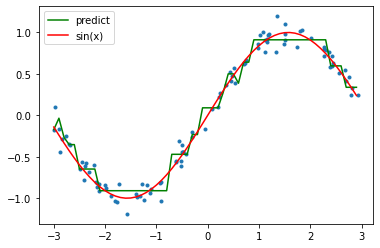

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Xとして乱数、
# 正解データとしてsin(X)に正規分布ノイズを加えたものを用意する。
import numpy as np
from numpy import random
random.seed(1)

points = 100
x_max = 3
x_min = -3
X = random.rand(points) * (x_max - x_min) + x_min
y = np.sin(X) + np.array([random.randn() * 0.1 for _ in range(points)])

plt.scatter(X, y, marker='.')
plot_x = np.arange(x_min, x_max, 0.1)
plt.plot(plot_x, np.sin(plot_x), label='sin(x)', c='r')
plt.legend()
plt.show()

from sklearn.tree import DecisionTreeRegressor
# 訓練データとテストデータの振り分け
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=4)

# 学習
dtr.fit(X_train, y_train)

# 評価
dtr.score(X_test, y_test)

# 回帰曲線を図示してみる。

predict = dtr.predict(plot_x.reshape(-1, 1))
plt.plot(plot_x, predict, c='g', label='predict')
#plt.scatter(X, y)

plt.scatter(X, y, marker='.')
plot_x = np.arange(x_min, x_max, 0.1)
plt.plot(plot_x, np.sin(plot_x), label='sin(x)', c='r')
plt.legend()

# dot へ export
from sklearn.tree import export_graphviz
export_graphviz(dtr, 'sin_decision_tree.dot')

# GraphVisツールで png に変換
! dot -Tpng sin_decision_tree.dot -o sin_decision_tree.png